In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('./Campaign-Data.csv')

In [3]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [4]:
df.shape

(2976, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

In [6]:
df['Calendardate']=pd.to_datetime(df['Calendardate'])
df['Calendar_Month']=df['Calendardate'].dt.month
df['Calendar_Year']=df['Calendardate'].dt.year

In [7]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


In [8]:
df['Client Type'].value_counts()

Large Facility      1368
Small Facility       840
Medium Facility      504
Private Facility     264
Name: Client Type, dtype: int64

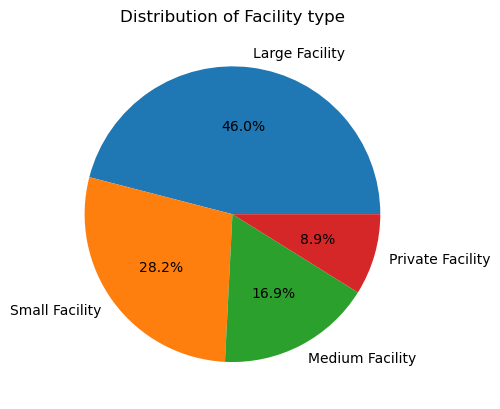

In [11]:
labels=['Large Facility ', 'Small Facility', 'Medium Facility', 'Private Facility']
plt.pie(df['Client Type'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title("Distribution of Facility type")
plt.show()

In [14]:
df.groupby(['Number of Competition']).mean()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Number of Competition,,,,,,,,,,,,,,,
High,1456.935484,75.080645,1003.0,2.974789e+07,213.127016,105398.938508,994046.717540,45198.036895,146945.564516,2.685333e+06,1.786754e+06,72172.379032,8452.620968,10.5,2015.0
Low,1456.935484,75.080645,1003.0,1.445570e+07,103.132258,150862.165766,623692.979839,26693.304194,128219.758065,1.890916e+06,1.883634e+06,70481.854839,15864.919355,5.7,2014.4


### Amount collected for high is almost double of amount collected for low. Same with unit sold

In [15]:
df.groupby(['Client Type']).mean()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


In [16]:
df.corr()[['Amount Collected']]

,Amount Collected
Number of Customers,0.607496
Montly Target,0.608204
Zip Code,NaN
Amount Collected,1.000000
Unit Sold,0.997515
Campaign (Email),0.248235
Campaign (Flyer),0.444337
Campaign (Phone),0.034858
Sales Contact 1,0.277478
Sales Contact 2,0.552112


In [34]:
cm=sns.light_palette('green', as_cmap=True)
correlation_analysis=pd.DataFrame(df[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                     'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Impacting Variable', 'Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Amount Collected']
correlation_analysis.sort_values(by=['Degree of Linear Impact (Correlation)'], ascending=False, inplace=True)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


In [37]:
cm=sns.light_palette('green', as_cmap=True)
correlation_analysis=pd.DataFrame(df.groupby('Client Type')[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                     'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Client Type', 'Impacting Variable', 'Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Amount Collected']
correlation_analysis.sort_values(by=['Client Type', 'Degree of Linear Impact (Correlation)'], ascending=False, inplace=True)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

,Client Type,Impacting Variable,Degree of Linear Impact (Correlation)
32,Small Facility,Sales Contact 2,0.22
33,Small Facility,Sales Contact 3,0.07
28,Small Facility,Campaign (Email),0.06
29,Small Facility,Campaign (Flyer),0.04
34,Small Facility,Sales Contact 4,0.02
35,Small Facility,Sales Contact 5,0.00
31,Small Facility,Sales Contact 1,-0.02
30,Small Facility,Campaign (Phone),nan
23,Private Facility,Sales Contact 2,0.57
20,Private Facility,Campaign (Flyer),0.28


In [47]:
df.columns=[mystring.replace(" ", "_") for mystring in df.columns]
df.columns=[mystring.replace("(", "") for mystring in df.columns]
df.columns=[mystring.replace(")", "") for mystring in df.columns]
results=smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:10:37   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [85]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(df['Client_Type']))):
    temp_data=df[df['Client_Type']==acctype].copy()
    results=smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df1=pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    df1=df1[df1['P>|t|']<0.05][['index', 'coef']]
    df1.columns=['Varibale', 'Coefficient (Imapct)']
    df1['Account Type']=acctype
    df1.sort_values(['Coefficient (Imapct)'], ascending=False, inplace=True)
    df1=df1[df1['Varibale']!='Intercept']
    consolidated_summary=consolidated_summary.append(df1)
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.829
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           6.63e-08
Time:                        13:36:03   Log-Likelihood:                -14125.
No. Observations:                 840   AIC:                         2.827e+04
Df Residuals:                     832   BIC:                         2.830e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.789e+05   2.07e+05     

In [86]:
consolidated_summary

,Varibale,Coefficient (Imapct),Account Type
5,Sales_Contact_2,0.810100,Small Facility
3,Campaign_Phone,0.000008,Small Facility
5,Sales_Contact_2,6.622300,Private Facility
2,Campaign_Flyer,4.105900,Medium Facility
5,Sales_Contact_2,3.577800,Medium Facility
4,Sales_Contact_1,3.136500,Medium Facility
6,Sales_Contact_3,2.117400,Medium Facility
4,Sales_Contact_1,11.673100,Large Facility
7,Sales_Contact_4,10.614500,Large Facility
5,Sales_Contact_2,4.003100,Large Facility


In [87]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index', axis=1, inplace=True)

In [88]:
consolidated_summary.columns=['Varibale', 'Return on Investement', 'Account Type']
consolidated_summary['Return on Investement']=consolidated_summary['Return on Investement'].apply(lambda x: round(x, 1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Varibale,Return on Investement,Account Type
0,Sales_Contact_2,0.800000,Small Facility
1,Campaign_Phone,0.000000,Small Facility
2,Sales_Contact_2,6.600000,Private Facility
3,Campaign_Flyer,4.100000,Medium Facility
4,Sales_Contact_2,3.600000,Medium Facility
5,Sales_Contact_1,3.100000,Medium Facility
6,Sales_Contact_3,2.100000,Medium Facility
7,Sales_Contact_1,11.700000,Large Facility
8,Sales_Contact_4,10.600000,Large Facility
9,Sales_Contact_2,4.000000,Large Facility


In [89]:
def format(x):
    return '${:.1f}'.format(x)

In [90]:
consolidated_summary['Return on Investement']=consolidated_summary['Return on Investement'].apply(format)

In [93]:
consolidated_summary

,Varibale,Return on Investement,Account Type
0,Sales_Contact_2,$0.8,Small Facility
1,Campaign_Phone,$0.0,Small Facility
2,Sales_Contact_2,$6.6,Private Facility
3,Campaign_Flyer,$4.1,Medium Facility
4,Sales_Contact_2,$3.6,Medium Facility
5,Sales_Contact_1,$3.1,Medium Facility
6,Sales_Contact_3,$2.1,Medium Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility
